# Backtest Overfitting

## Definition 2.1(Bactest Overfitting)

We say that the backtest stratetgy selection process overfits if a strategy with optimal performance IS has an expected ranking below the median OOS. By the Bayesian formula and using the notation above that is

$$\sum_{n=1}^N E[\bar{r_n}|r \in \Omega^*_{n}] Prob[\in \Omega^*_{n}] \le N/2$$

## Definition 2.2(Probability of Backtest Overfitting)

A strategy with optimal performance IS is not necessarily optimal OOS.Moreover, there is a non-null probability that this strategy with optimal performance IS ranks below the median OOS. This is what we define as the probability of backtest overfit(PBO).

$$\text{PBO} = \sum_{n=1}^N P\left[ \bar{r_n} < N/2 | r \in \Omega^*_{n} \right] P\left[ r \in \Omega^*_n \right]$$

## Algorithm 2.3 (CSCV - Combinatorially symmetric cross-validation)

### Step 1 - form matrix M

Matrix $M$ has $N$ columns, which are the different strategies selected, to evaluate for potential overfit. We then have $t=1,2,...,T$ rows. Thus, you have performances of the $N$ strategies at different times. Keep in mind, that dates ($t=1,2,...,T$) have to be synchronised, i.e. if a performance measurement for strategy labelled $1$ is made on date $x$, then for all other strategies $2,3,4,...,N$ a measurement has to be made on the same date.
<br><br>
Assumption is made that performance measurements on $t=1,2,...,T$ are independent. Thus, you cannot just run $N$ strategies and take the performance measurements on different time-points because those would be autocorrelated. You can get away by defining \"windows\". For example, from $t=1$ to $t=2$ what was the starting equity and ending equity, and take a Sharpe, or annual-return. This will work. Though, in some special cases, where the strategy would have performed completely different (due to some kind of smoothing for example), this is not a feasible solution. And thus, one would be required to run independent $T$ backtests, for each of the $N$ strategies, to attempt and adhere to the independence assumption.

### Step 2 - Partition $M$ into $S$ disjoint submatrices

Note that $S$ should be even. You end up with $M_s$ matrices, that are ${R}^{T/S*N}$

### Step 3 - Form all combination of $M_s$

Form all $C_S$ combinations of $M_s$ matrices (taken in groups of $S/2$). So suppose that $M$ is something like the following:
$$M=
\begin{bmatrix}
    [ ---- M_1 ---- ] \\
    [ ---- M_2 ---- ] \\
    [ ---- M_3 ---- ] \\
    [ ---- M_4 ---- ]
\end{bmatrix}$$

Where $M \in \mathbb{R}^{T \times N}$ and each $M_s \in \mathbb{R}^{T/S \times N}$. Note that:

$$ {S \choose S/2} = \frac{(S-1)! S}{(S-S/2)!(S/2-1)! S/2} = {S-1 \choose S/2-1} \frac{S}{S/2} = ... = \prod_{i=0}^{S/2-1} \frac{S-i}{S/2-i} $$

And so according to the equation above, and to the example matrix, $S=4$, so the number of combinations is ${4 \choose 2 }= 6$, and these are:

$$C_4 = \{\{M_1,M_2\},\{M_1,M_3\},\{M_1,M_4\},\{M_2,M_3\},\{M_2,M_4\},\{M_3,M_4\}\}$$

Thus: $$|\{C_S\}| = {S \choose S/2}$$

### Step 4

For each combination $c \in C_S$ (e.g.: $\{M_1,M_2\},\{M_1,M_3\},...)$:

a) Form $J$ (training set). 

If $c=\{M_1,M_2\}$, then 

$$J=
\begin{bmatrix}
    [ ---- M_1 ---- ] \\
    [ ---- M_2 ---- ] 
\end{bmatrix}$$

$J \in \mathbb{R}^{T/2 \times N}$

b) Form $\bar{J}$ (testing set).

If $c=\{M_1,M_2\}$, then

$$\bar{J}=
\begin{bmatrix}
    [ ---- M_3 ---- ] \\
    [ ---- M_4 ---- ] 
\end{bmatrix}$$

$\bar{J} \in \mathbb{R}^{T/2 \times N}$

Note that the order is preserved! For some performance measures, e.g. Sharpe, order is not important. But for drawdown, it certainly is.

c) Form vector $R^c$ (IS performance) 

d) Form vector $\bar{R}^c$ (OOS performance). 

Derive $\bar{r}^c$.

e) Determine the element $n^*$ such that $r^c_{n^*} \in \Omega^*_{n^*}$. 

In other words, if $r_c=(1,4,2,3)$ and thus, the best performing strategy is at index $2$, so $n^*=2$. This is becasue, for example $\Omega_3^*$ when $N=4$ is $\{f \in \Omega | f_3=4 \} = \{ (1,2,4,3),(2,1,4,3), (1,3,4,2), (3,1,4,2), ... \}$, i.e. third strategy is always the best

f) Define the relative rank of $r_{n^*}^c$ (i.e. relative rank of the best performing strategy IS in the OOS). 

$\bar{\omega_c} := \bar{r}^c_{n^*}/(N+1) \in (0,1)$

**If the strategy optimization procedure is not overfitting, we should observe that $r_{n^*}^c$ systematically outperforms OOS**

g) Define/compute the *logit* $\lambda_c = \ln{\frac{\bar{\omega_c}}{1-\bar{\omega_c}}}$.

**High logit values imply a consistency between IS and OOS performances, which indicates a low level of overfitting**

To summarize:

1) Form training set $J$

2) Form testing set $\bar{J}$

3) Form performances vector IS $R^c$, derive $r^c$

4) Form performances vector OOS $\bar{R}^c$, derive $\bar{r}^c$

5) Determine element $n^*$

6) Compute relative rank: $\bar{\omega}^c$

7) Compute logit: $\lambda_c$


### Step 5 - Logit Frequency

Compute the distribution of ranks OOS by collecting all the $\lambda_c$, for $c \in C_S$

$$f(\lambda) = \sum_{c \in C_s} \frac{\chi_{\{\lambda\}} \left( \lambda_c\right)}{|\{C_S\}|}$$

Also note

$$f_{-\infty}^{\infty} f(\lambda) d\lambda = 1$$

# Overfit Statistics

### 1) Probability of Backtest Overfitting (PBO)

The probability that the model configuration selected as optimal IS will underperform the median of the N model configurations OOS.

$$\text{PBO} = \sum_{n=1}^N P\left[ \bar{r_n} < N/2 | r \in \Omega^*_{n} \right] P\left[ r \in \Omega^*_n \right] = \int_{-\infty}^0 f(\lambda) d\lambda$$

Where,

$$f(\lambda) = \sum_{c \in C_S} \frac{\chi_{\{ \lambda\}} \left( \lambda_c \right)}{|\{ C_S \}|}$$

i.e. the frequency (PDF) of logits. They are discrete, thus the statement above makes sense ($\chi{\{\cdot\} \left( \cdot \right)}$ is an indicator function)

### 2) Performance degradation

This determines to what extent greater performance IS leads to lower performance OOS, an occurence associated with the memory effects discussed in Bailey et al. [1]

Peform a  regression:

$$\bar{R_{n^*}}^c = \alpha + \beta R_{n^*}^c + \epsilon^c$$

### 3) Probability of loss

The probability that the model selecteed as optimal IS will deliver a loss OOS.

Compute:

$$P \left[ \bar{R_{n^*}}^c < 0 \right]$$

### 4) Stochastic dominance

This analysis determines whether the procedure used to select a strategy IS is preferable to randomly choosing one model configurations among the N altenratives.

First  order stochastic dominance if:

$$P \left[ \bar{R_{n^*} \geq x} \right] \geq P \left[\text{Mean}(\bar{R}) \geq x \right] \ \ \forall x$$
and
$$P \left[ \bar{R_{n^*} \geq x} \right] > P \left[\text{Mean}(\bar{R}) \geq x \right] \ \ \text{for some} \ \ x$$

A less demanding criterion is second-order stochastic dominance. This requires that:

$$\text{SD}2[x] = \int_{-\infty}^x (P\left[ \text{Mean}(\bar{R}) \leq x \right] - P\left[ \bar{R_{n^*}} \leq x \right]) dx \geq 0 \ \ \forall x$$

and that

$$\text{SD}2[x] > 0 \ \ \text{at some} \ \ x$$

### Example

In [2]:
%matplotlib inline
from numpy import inf
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
sns.despine()
import numpy as np
import itertools
import pandas as pd
import scipy.stats

<Figure size 640x480 with 0 Axes>

#### Step by step

In [3]:
# Step 1

T = 16 #number of columns
S = 4 #disjoint of submatrices
N = 30 #number of rows

Matrix = np.random.rand(T,N)
print(Matrix)

[[6.28580039e-01 7.32494885e-01 1.00217462e-01 5.73079012e-01
  1.88174391e-01 7.03734566e-01 4.56911727e-01 1.85324770e-01
  5.79948146e-01 3.76816016e-01 2.81639677e-01 7.33564103e-01
  5.95610166e-01 3.59180742e-01 4.17702843e-01 4.70995199e-01
  7.83307100e-01 5.33354524e-01 2.50973556e-01 8.87651805e-01
  7.82802980e-01 6.30135335e-01 7.44870188e-01 7.52643411e-01
  5.60887677e-01 9.35200057e-01 4.74256464e-01 5.16035618e-01
  6.32080675e-01 5.89183001e-01]
 [8.50023486e-01 6.93016708e-01 5.05252125e-01 3.69798959e-01
  8.73840659e-01 2.40952509e-01 7.23931361e-01 6.34858646e-01
  3.37740116e-01 1.08756189e-02 4.20680805e-01 7.40777606e-01
  9.23492114e-01 7.70968604e-01 3.80782179e-02 8.17782529e-01
  1.24329639e-01 1.46388199e-01 1.84493203e-01 6.74782200e-01
  4.31817263e-01 2.06179549e-01 6.40684246e-01 7.56493170e-01
  6.88919949e-01 2.99462638e-01 6.28298937e-01 2.35170617e-01
  9.44216092e-01 8.67599968e-01]
 [6.11450990e-01 6.41203125e-01 7.09274665e-01 6.08374803e-01
  6.

In [4]:
# Check the Matrix

Matrix.shape

(16, 30)

In [5]:
# Step 2

sub_matricies = []

for i in range(int(T/S)): # dived columns by S
    sub_matricies.append(Matrix[S*i:(S*i + int(S))])

print(sub_matricies)

[array([[6.28580039e-01, 7.32494885e-01, 1.00217462e-01, 5.73079012e-01,
        1.88174391e-01, 7.03734566e-01, 4.56911727e-01, 1.85324770e-01,
        5.79948146e-01, 3.76816016e-01, 2.81639677e-01, 7.33564103e-01,
        5.95610166e-01, 3.59180742e-01, 4.17702843e-01, 4.70995199e-01,
        7.83307100e-01, 5.33354524e-01, 2.50973556e-01, 8.87651805e-01,
        7.82802980e-01, 6.30135335e-01, 7.44870188e-01, 7.52643411e-01,
        5.60887677e-01, 9.35200057e-01, 4.74256464e-01, 5.16035618e-01,
        6.32080675e-01, 5.89183001e-01],
       [8.50023486e-01, 6.93016708e-01, 5.05252125e-01, 3.69798959e-01,
        8.73840659e-01, 2.40952509e-01, 7.23931361e-01, 6.34858646e-01,
        3.37740116e-01, 1.08756189e-02, 4.20680805e-01, 7.40777606e-01,
        9.23492114e-01, 7.70968604e-01, 3.80782179e-02, 8.17782529e-01,
        1.24329639e-01, 1.46388199e-01, 1.84493203e-01, 6.74782200e-01,
        4.31817263e-01, 2.06179549e-01, 6.40684246e-01, 7.56493170e-01,
        6.88919949e-01

In [6]:
# Step 3
combinations = itertools.combinations(sub_matricies, int(S/2)) 

In [7]:
# Step 4-1: form J

J = np.array(next(combinations))

print(J)

[[[6.28580039e-01 7.32494885e-01 1.00217462e-01 5.73079012e-01
   1.88174391e-01 7.03734566e-01 4.56911727e-01 1.85324770e-01
   5.79948146e-01 3.76816016e-01 2.81639677e-01 7.33564103e-01
   5.95610166e-01 3.59180742e-01 4.17702843e-01 4.70995199e-01
   7.83307100e-01 5.33354524e-01 2.50973556e-01 8.87651805e-01
   7.82802980e-01 6.30135335e-01 7.44870188e-01 7.52643411e-01
   5.60887677e-01 9.35200057e-01 4.74256464e-01 5.16035618e-01
   6.32080675e-01 5.89183001e-01]
  [8.50023486e-01 6.93016708e-01 5.05252125e-01 3.69798959e-01
   8.73840659e-01 2.40952509e-01 7.23931361e-01 6.34858646e-01
   3.37740116e-01 1.08756189e-02 4.20680805e-01 7.40777606e-01
   9.23492114e-01 7.70968604e-01 3.80782179e-02 8.17782529e-01
   1.24329639e-01 1.46388199e-01 1.84493203e-01 6.74782200e-01
   4.31817263e-01 2.06179549e-01 6.40684246e-01 7.56493170e-01
   6.88919949e-01 2.99462638e-01 6.28298937e-01 2.35170617e-01
   9.44216092e-01 8.67599968e-01]
  [6.11450990e-01 6.41203125e-01 7.09274665e-01 6.

In [8]:
J.shape

(2, 4, 30)

In [9]:
# Step 4-2: form J_bar
# list comprehensions to preserve the order
J_bar = [x for x in sub_matricies if x not in J]

print(J_bar)

[array([[0.09350873, 0.42364494, 0.48021313, 0.96584364, 0.3835012 ,
        0.80395157, 0.29601564, 0.49822326, 0.45291597, 0.18657044,
        0.93687994, 0.80435066, 0.51978242, 0.81681796, 0.33537718,
        0.64962143, 0.04494266, 0.26034363, 0.80921039, 0.6597101 ,
        0.35136646, 0.44992339, 0.23950973, 0.27082997, 0.37446448,
        0.92417127, 0.0456575 , 0.2983774 , 0.90506055, 0.94532769],
       [0.80578476, 0.37868122, 0.83521439, 0.8117343 , 0.68717677,
        0.96234241, 0.9647835 , 0.42443095, 0.72850983, 0.46757563,
        0.33206322, 0.63238274, 0.44910364, 0.51114114, 0.54250515,
        0.24175929, 0.75919324, 0.10001059, 0.79464086, 0.58471646,
        0.76855017, 0.85270387, 0.15833726, 0.41256366, 0.9915073 ,
        0.44321542, 0.32507278, 0.67611225, 0.09686481, 0.62038426],
       [0.06381062, 0.17284083, 0.36472104, 0.7701656 , 0.82928915,
        0.98086107, 0.95850659, 0.97388623, 0.37782173, 0.38411877,
        0.82538303, 0.73408765, 0.65846356, 0

In [10]:
# Step 4-3) form R^c

R = np.sum(np.sum(J, axis=1), axis=0)

print(R)

[5.71585308 3.86048486 4.03547691 4.04773619 3.05328938 3.10546685
 3.39421218 3.69031195 3.68075053 3.05078134 3.86858    4.87376887
 4.33117126 5.15975347 3.8084374  4.33742914 2.78956025 2.90256415
 3.74992317 6.17907052 4.39210977 4.07889619 4.89506808 5.17112857
 3.88481088 3.65421374 4.55093289 3.95455589 4.67136157 3.68946509]


In [11]:
# Step 4-4) form R^c_bar

R_bar = np.sum(np.sum(J_bar, axis=1), axis=0)
print(R_bar)

[2.5353205  4.67323426 5.09210232 4.99157061 4.07803936 5.96167686
 4.29486258 4.97136008 4.4339761  3.92670901 4.51179082 4.2908606
 4.17859739 3.88478517 2.85793647 4.16143113 4.16854344 3.87788455
 4.66324796 2.86660105 4.15692332 5.56019049 4.43891771 3.74580987
 6.07593688 4.71990397 2.96867375 4.72897778 3.45458552 5.87684358]


In [12]:
# Step 4-5) Determine element n_star

n_star = np.where(R==np.max(R)) 

print(n_star[0][0])

19


In [13]:
# Step 4-6) Compute relative rank

intermediate = R_bar.argsort() #argsort
ranks = intermediate.argsort()

omega_bar = ranks[n_star[0][0]]/(N+1)

print(omega_bar)



0.06451612903225806


In [14]:
# Step 4-7) Compute logit

logit = np.log(omega_bar/(1-omega_bar))

print(logit)

-2.6741486494265287


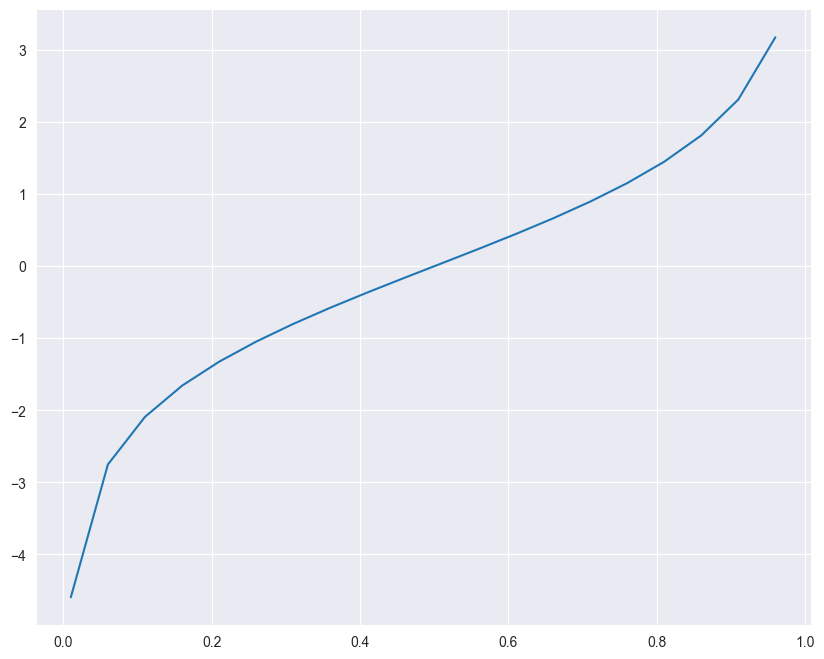

In [15]:
# Visualize the logit function

x = np.arange(0.01, 1, 0.05)
y = np.log(x/(1-x))

f = plt.figure(figsize = (10,8))
ax = f.add_subplot()

ax.plot(x, y)

#### Combine all the above to produce logit distributions

In [16]:
Matrix = np.random.randn(258,40)
S = 16

In [17]:
def produce_logits(Matrix, S):
    T = Matrix.shape[0]

    sub_matricies = []
    all_R_bar = []
    performance_defradation_R = []
    performance_defradation_R_bar = []

    for i in range(int(T/S)):
        sub_matricies.append(Matrix[S*i:(S*i+int(S))])

    combinations = itertools.combinations(sub_matricies, int(S/2))

    logits = []

    for J in combinations:
        J = np.array(J)
        J_bar = [x for x in sub_matricies if x not in J]

        R = np.sum(np.sum(J,axis=1), axis=0)
        R_bar = np.sum(np.sum(J_bar,axis=1), axis=0)
        
        for r in R_bar:
            all_R_bar.append(r)

        n_star = np.where(R==np.max(R))
        ranks = R_bar.argsort().argsort()

        performance_defradation_R.append(np.max(R))
        performance_defradation_R_bar.append(R_bar[n_star[0][0]])

        N = sub_matricies[0].shape[1]
        omega_bar = ranks[n_star[0][0]]/(N+1)

        logit = np.log(omega_bar/(1-omega_bar))
        logits.append(logit)

    return logits, [performance_defradation_R, performance_defradation_R_bar, all_R_bar]



In [18]:
logits, [R, R_bar, all_R_bar] = produce_logits(Matrix, S)

/var/folders/38/t6qndn3j29gg5t1v2fyw6xlr0000gn/T/ipykernel_53588/3634998890.py:35: RuntimeWarning: divide by zero encountered in log
  logit = np.log(omega_bar/(1-omega_bar))


In [19]:
logits = [x for x in logits if (x != -inf)]
logits = pd.DataFrame(data=logits, columns=['logits'])

In [20]:
logits

,logits
0,-1.131402
1,-2.538974
2,-1.974081
3,-0.446287
4,-1.763589
...,...
12781,0.550046
12782,0.882389
12783,0.446287
12784,1.580450


In [21]:
PBO = len(logits.loc[logits.logits<0])/len(logits.logits)

Text(0, 0.5, 'SR OOS')

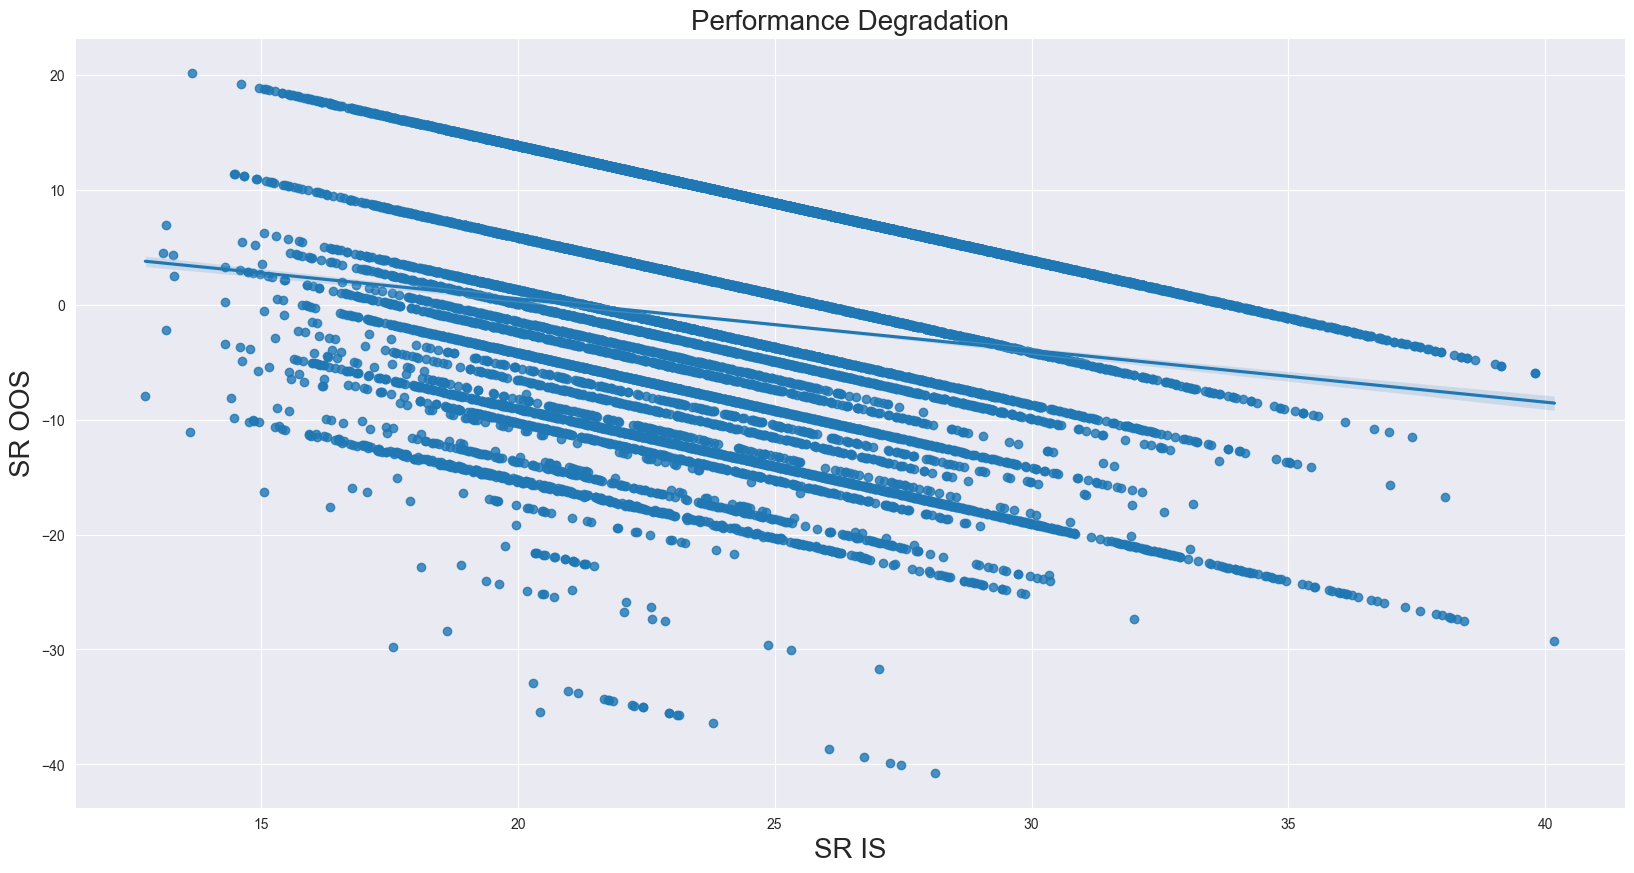

In [22]:
f = plt.figure(figsize=(20,10))
ax = f.add_subplot(111)

p = sns.regplot(x=np.array(R),y=np.array(R_bar),ax=ax)

ax.set_title('Performance Degradation', fontsize=20)
ax.set_xlabel('SR IS', fontsize=20)
ax.set_ylabel('SR OOS', fontsize=20)

In [23]:
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x=p.get_lines()[0].get_xdata(),y=p.get_lines()[0].get_ydata())
formatter = '{0:.2f}'
print(r'[SROOS]='+formatter.format(intercept)+'+'+formatter.format(slope)+'*[SRIS]+err')
print(r'P[R_n^c<0]=P[SROOS<0]='+formatter.format(len(np.where(np.array(R_bar)<0)[0])/len(np.array(R_bar))))

[SROOS]=9.53+-0.45*[SRIS]+err
P[R_n^c<0]=P[SROOS<0]=0.55


/var/folders/38/t6qndn3j29gg5t1v2fyw6xlr0000gn/T/ipykernel_53588/3231032462.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(logits.logits, hist_kws=dict(cumulative=True),kde_kws=dict(cumulative=True),ax=ax)


Text(0.5, 1.0, 'PBO and Summary')

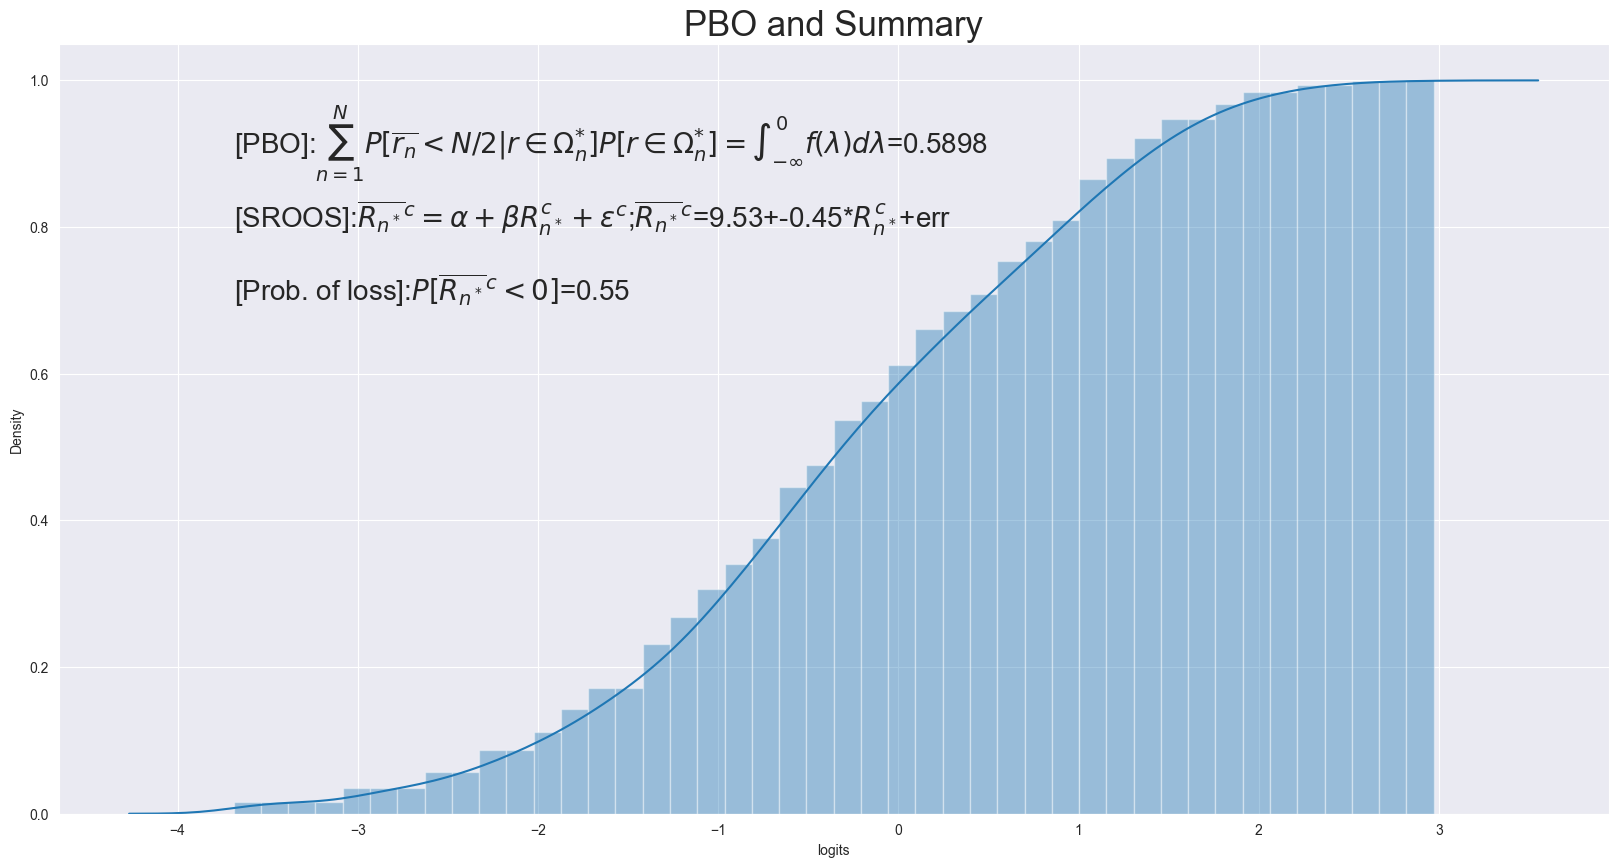

In [24]:
f = plt.figure(figsize=(20,10))
ax = f.add_subplot(111)

minLogit = np.min(logits.logits)

sns.distplot(logits.logits, hist_kws=dict(cumulative=True),kde_kws=dict(cumulative=True),ax=ax)
ax.text(minLogit, 0.9, '[PBO]:$\sum_{n=1}^N P[\overline{r_n} < N/2 | r \in \Omega^{*}_n] P[r \in \Omega^{*}_n]=\int_{-\infty}^{0}f(\lambda) d\lambda$=' + '{:.4f}'.format(PBO),fontsize=20)
ax.text(minLogit,0.8,'[SROOS]:'+'$\overline{R_{n^*}}^c = \\alpha + \\beta R^c_{n^*}+\\epsilon^c$;$\overline{R_{n^*}}^c$='+formatter.format(intercept)+'+'+formatter.format(slope)+'*$R^c_{n^*}$+err',fontsize=20)
ax.text(minLogit,0.7,'[Prob. of loss]:'+'$P[\overline{R_{n^*}}^c < 0]$='+formatter.format(len(np.where(np.array(R_bar)<0)[0])/len(np.array(R_bar))),fontsize=20)

ax.set_title('PBO and Summary',fontsize=25)

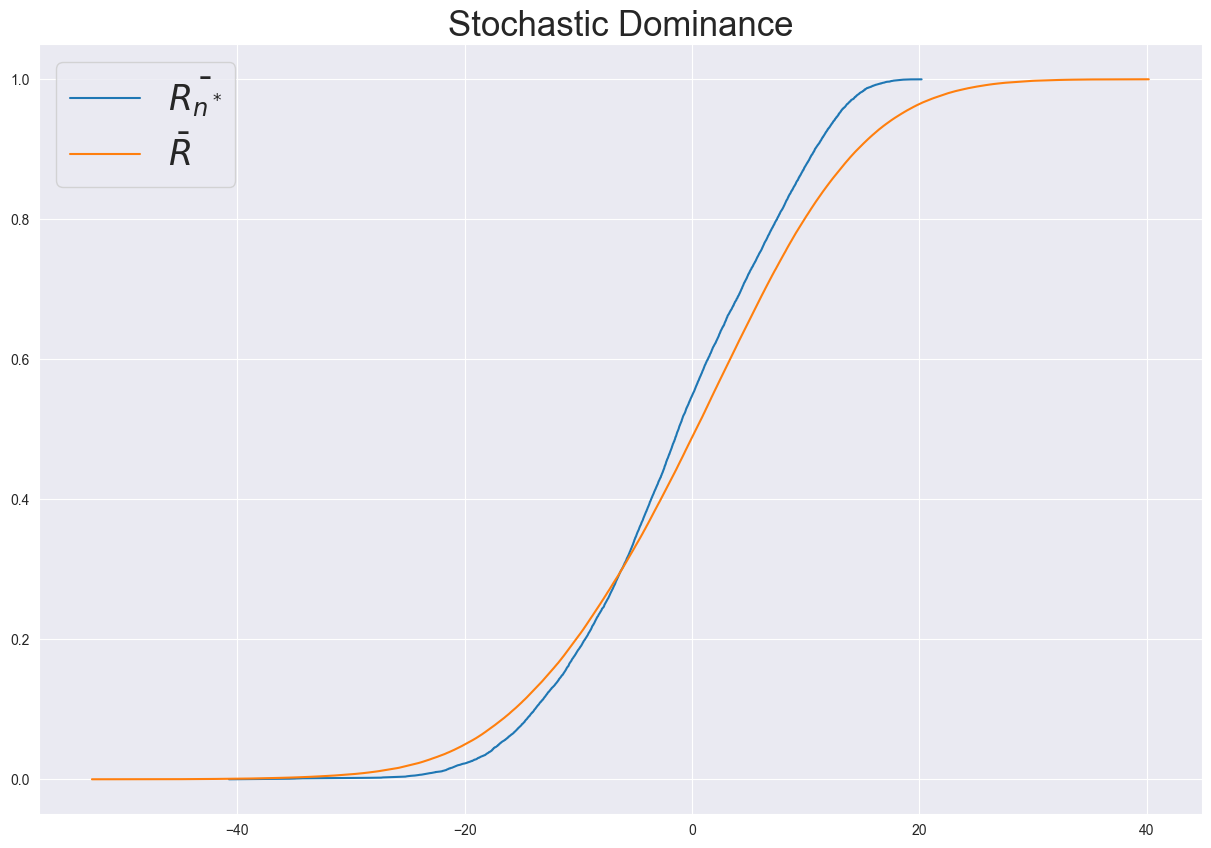

In [25]:
f = plt.figure(figsize=(15,10))
ax = f.add_subplot(111)

best_R = np.sort(np.array(R_bar))
cdf_1 = np.arange(len(best_R))/float(len(best_R))
ax.plot(best_R, cdf_1,label=r'$\bar{R_{n^*}}$')

all_R = np.sort(np.array(all_R_bar))
cdf_2 = np.arange(len(all_R_bar))/float(len(all_R_bar))
ax.plot(all_R, cdf_2,label=r'$\bar{R}$')

ax.set_title('Stochastic Dominance', fontsize=25)

plt.legend(fontsize=25)